In [1]:
!pip install soundfile

In [2]:
import os
import numpy as np
import pandas as pd
import soundfile as sf
import scipy.signal as signal
import matplotlib.pyplot as plt

In [3]:
train_path = '../input/train/train/'
test_path = '../input/test/test/'

In [4]:
filename = 'de_f_0809fd0642232f8c85b0b3d545dc2b5a.fragment1.flac'

In [5]:
data, samplerate = sf.read(train_path+filename)

In [6]:
data

array([-0.03903198, -0.03997803, -0.05319214, ..., -0.00836182,
        0.01141357,  0.01940918])

Text(0.5, 0, 'Time [sec]')

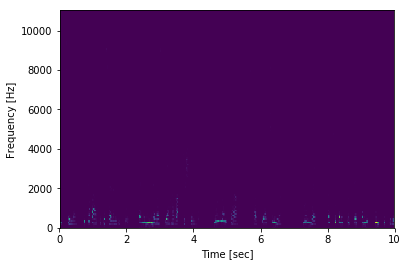

In [7]:
freq, time, Sxx = signal.spectrogram(data, samplerate, scaling='spectrum')
plt.pcolormesh(time, freq, Sxx)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

Text(0.5, 0, 'Time [sec]')

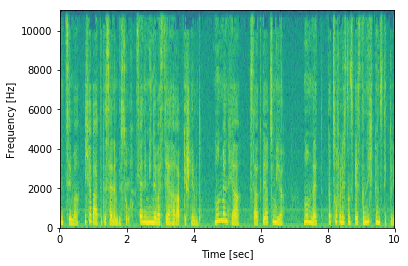

In [8]:
Pxx, freqs, bins, im = plt.specgram(data, Fs=samplerate)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [9]:
data

array([-0.03903198, -0.03997803, -0.05319214, ..., -0.00836182,
        0.01141357,  0.01940918])

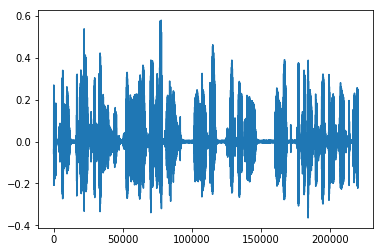

In [10]:
plt.plot(data)

In [11]:
label = []
for filename in os.listdir(train_path)[:1000]:
    label.append(filename[:2])

In [12]:
gender = []
for filename in os.listdir(train_path)[:1000]:
    gender.append('male' if filename[3:4]=='m' else 'female')

In [13]:
sound_type = []
for filename in os.listdir(train_path)[:1000]:
    sound_type.append('noise' if 'noise' in filename else 'pitch' if 'pitch' in filename else 'speed' if 'speed' in filename else 'notype')

In [14]:
file = []
for filename in os.listdir(train_path)[:1000]:
    file.append(filename)

In [15]:
series = []
length = []
for filename in os.listdir(train_path)[:1000]:
    flac, samplerate = sf.read(train_path+filename)
    series.append(flac)
    length.append(samplerate)

In [16]:
data = {'Gender':gender,
        'filename':file,
           'Sound_type': sound_type,
       'language':label,
       'series': series,
       'length': length}

In [17]:
df = pd.DataFrame(data)

In [18]:
df

,Gender,filename,Sound_type,language,series,length
0,female,en_f_eddb714cb803dd6a58e6139f7462257e.fragment...,pitch,en,"[0.000579833984375, 0.00067138671875, 0.000549...",22050
1,male,de_m_fc6bd6bb9d66a89bb8d8a8a7efa23e6b.fragment...,speed,de,"[0.1341552734375, 0.19976806640625, 0.15924072...",22050
2,male,en_m_61764486dd621ce03fa461e92cd9e2b3.fragment...,pitch,en,"[-0.031341552734375, -0.040130615234375, -0.02...",22050
3,male,de_m_ce41a51416f32ba7bb772887de8e0ebf.fragment...,pitch,de,"[-0.004852294921875, -0.00750732421875, -0.004...",22050
4,male,en_m_d2f13c7f37ecec67df0f46408c224bc1.fragment...,noise,en,"[-0.013671875, -0.02532958984375, -0.038177490...",22050
5,male,en_m_17b5d4995191976232356345dfbb82cb.fragment...,noise,en,"[0.02142333984375, 0.02105712890625, 0.0209045...",22050
6,male,es_m_60f8a38a1112aed756fd2bc91b0b52e0.fragment...,speed,es,"[-6.103515625e-05, 0.000152587890625, -3.05175...",22050
7,male,en_m_f7d28f7498eaf373b312abcdc0886951.fragment...,noise,en,"[0.010711669921875, 0.007904052734375, 0.00646...",22050
8,female,de_f_bce247cbc0fe8ff27de25b3adf154d92.fragment...,pitch,de,"[-0.010284423828125, -0.00836181640625, -0.007...",22050
9,male,de_m_0345d503166fbcb125b6e10e2e804443.fragment...,noise,de,"[0.04351806640625, 0.041961669921875, 0.042419...",22050


In [19]:
len(df)

1000

In [20]:
df_male_en = df[(df['Gender']=='male') & (df['language']=='en')].reset_index(drop=True)
df_male_es = df[(df['Gender']=='male') & (df['language']=='es')].reset_index(drop=True)
df_male_de = df[(df['Gender']=='male') & (df['language']=='de')].reset_index(drop=True)
df_female_en = df[(df['Gender']=='female') & (df['language']=='en')].reset_index(drop=True)
df_female_es = df[(df['Gender']=='female') & (df['language']=='es')].reset_index(drop=True)
df_female_de = df[(df['Gender']=='female') & (df['language']=='de')].reset_index(drop=True)

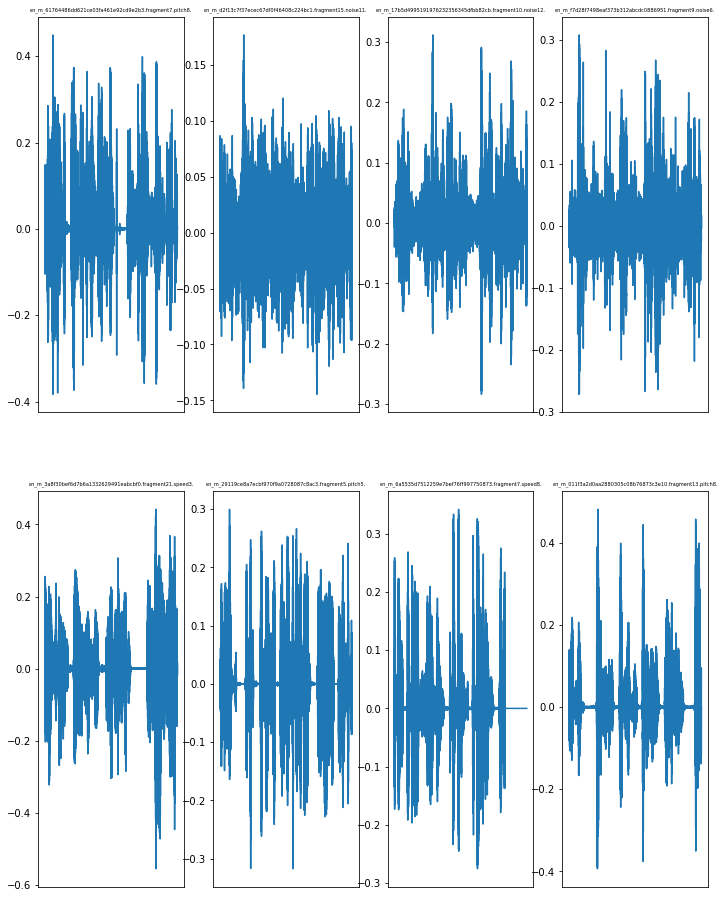

In [21]:
fig, ax = plt.subplots(2, 4, figsize = (12, 16))
for i in range(8):
    ax[i//4, i%4].plot(df_male_en['series'][i])
    ax[i//4, i%4].set_title(df_male_en['filename'][i][:-4], fontsize=5)
    ax[i//4, i%4].get_xaxis().set_ticks([])

The first 8 male with espanol language waveform

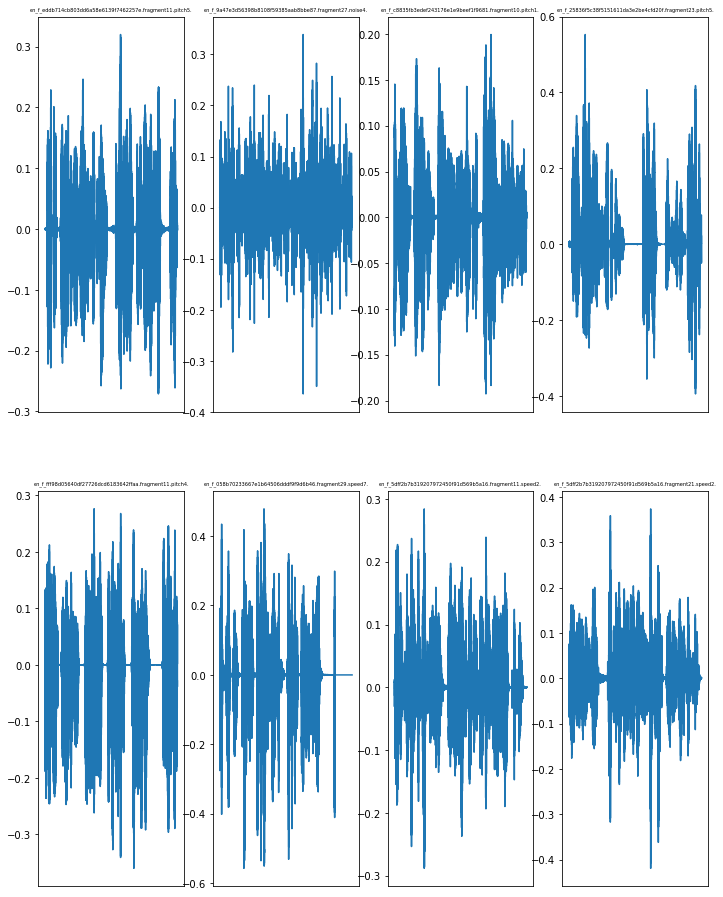

In [22]:
fig, ax = plt.subplots(2, 4, figsize = (12, 16))
for i in range(8):
    ax[i//4, i%4].plot(df_female_en['series'][i])
    ax[i//4, i%4].set_title(df_female_en['filename'][i][:-4], fontsize=5)
    ax[i//4, i%4].get_xaxis().set_ticks([])

In [23]:
df.columns

Index(['Gender', 'filename', 'Sound_type', 'language', 'series', 'length'], dtype='object')

In [24]:

df.dtypes

Gender        object
filename      object
Sound_type    object
language      object
series        object
length         int64
dtype: object

In [25]:
df_lang = df

In [26]:
df_lang.language.replace({'en':1,'es':2,'de':3},inplace=True)

df_lang.language.unique()


array([1, 3, 2])

In [27]:
df_lang

,Gender,filename,Sound_type,language,series,length
0,female,en_f_eddb714cb803dd6a58e6139f7462257e.fragment...,pitch,1,"[0.000579833984375, 0.00067138671875, 0.000549...",22050
1,male,de_m_fc6bd6bb9d66a89bb8d8a8a7efa23e6b.fragment...,speed,3,"[0.1341552734375, 0.19976806640625, 0.15924072...",22050
2,male,en_m_61764486dd621ce03fa461e92cd9e2b3.fragment...,pitch,1,"[-0.031341552734375, -0.040130615234375, -0.02...",22050
3,male,de_m_ce41a51416f32ba7bb772887de8e0ebf.fragment...,pitch,3,"[-0.004852294921875, -0.00750732421875, -0.004...",22050
4,male,en_m_d2f13c7f37ecec67df0f46408c224bc1.fragment...,noise,1,"[-0.013671875, -0.02532958984375, -0.038177490...",22050
5,male,en_m_17b5d4995191976232356345dfbb82cb.fragment...,noise,1,"[0.02142333984375, 0.02105712890625, 0.0209045...",22050
6,male,es_m_60f8a38a1112aed756fd2bc91b0b52e0.fragment...,speed,2,"[-6.103515625e-05, 0.000152587890625, -3.05175...",22050
7,male,en_m_f7d28f7498eaf373b312abcdc0886951.fragment...,noise,1,"[0.010711669921875, 0.007904052734375, 0.00646...",22050
8,female,de_f_bce247cbc0fe8ff27de25b3adf154d92.fragment...,pitch,3,"[-0.010284423828125, -0.00836181640625, -0.007...",22050
9,male,de_m_0345d503166fbcb125b6e10e2e804443.fragment...,noise,3,"[0.04351806640625, 0.041961669921875, 0.042419...",22050


In [28]:
df_l=df_lang

In [29]:
df_l

,Gender,filename,Sound_type,language,series,length
0,female,en_f_eddb714cb803dd6a58e6139f7462257e.fragment...,pitch,1,"[0.000579833984375, 0.00067138671875, 0.000549...",22050
1,male,de_m_fc6bd6bb9d66a89bb8d8a8a7efa23e6b.fragment...,speed,3,"[0.1341552734375, 0.19976806640625, 0.15924072...",22050
2,male,en_m_61764486dd621ce03fa461e92cd9e2b3.fragment...,pitch,1,"[-0.031341552734375, -0.040130615234375, -0.02...",22050
3,male,de_m_ce41a51416f32ba7bb772887de8e0ebf.fragment...,pitch,3,"[-0.004852294921875, -0.00750732421875, -0.004...",22050
4,male,en_m_d2f13c7f37ecec67df0f46408c224bc1.fragment...,noise,1,"[-0.013671875, -0.02532958984375, -0.038177490...",22050
5,male,en_m_17b5d4995191976232356345dfbb82cb.fragment...,noise,1,"[0.02142333984375, 0.02105712890625, 0.0209045...",22050
6,male,es_m_60f8a38a1112aed756fd2bc91b0b52e0.fragment...,speed,2,"[-6.103515625e-05, 0.000152587890625, -3.05175...",22050
7,male,en_m_f7d28f7498eaf373b312abcdc0886951.fragment...,noise,1,"[0.010711669921875, 0.007904052734375, 0.00646...",22050
8,female,de_f_bce247cbc0fe8ff27de25b3adf154d92.fragment...,pitch,3,"[-0.010284423828125, -0.00836181640625, -0.007...",22050
9,male,de_m_0345d503166fbcb125b6e10e2e804443.fragment...,noise,3,"[0.04351806640625, 0.041961669921875, 0.042419...",22050


In [30]:
series2 = []
for r in series:
    series2.append(r[:22500])

In [31]:
for s in series2:
    print(s.shape)

(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(22500,)
(

In [32]:
len(series2)

1000

In [33]:
import numpy as np
import os
from sklearn.model_selection import train_test_split

y=df_lang.language
files = np.array(series2)
y = np.array(y)
paths_train, paths_valid, y_train, y_valid = train_test_split(files, y, test_size = 0.2, random_state=45)
print(paths_train.shape, y_train.shape, paths_valid.shape, y_valid.shape)

(800, 22500) (800,) (200, 22500) (200,)


In [34]:

print(paths_train.shape)
print(paths_train[0].shape)
print(paths_valid.shape)
print(paths_valid[0].shape)

(800, 22500)
(22500,)
(200, 22500)
(22500,)


In [35]:
import numpy as np
paths_train = np.reshape(paths_train, (paths_train.shape[0], 1, paths_train.shape[1]))
paths_valid = np.reshape(paths_valid, (paths_valid.shape[0], 1, paths_valid.shape[1]))

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [37]:
model = Sequential()
model.add(LSTM(128, input_shape=(paths_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [39]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

model.fit(paths_train,
          y_train,
          epochs=1000,
          validation_data=(paths_valid, y_valid))

Train on 800 samples, validate on 200 samples
Epoch 1/1000
800/800 [==============================] - 3s 3ms/sample - loss: 0.8925 - acc: 0.6313 - val_loss: 1.3179 - val_acc: 0.4000
Epoch 2/1000
800/800 [==============================] - 0s 505us/sample - loss: 0.6361 - acc: 0.7450 - val_loss: 1.3651 - val_acc: 0.3600
Epoch 3/1000
800/800 [==============================] - 0s 526us/sample - loss: 0.4481 - acc: 0.8250 - val_loss: 1.4897 - val_acc: 0.3800
Epoch 4/1000
800/800 [==============================] - 0s 510us/sample - loss: 0.3348 - acc: 0.8737 - val_loss: 1.5407 - val_acc: 0.4350
Epoch 5/1000
800/800 [==============================] - 0s 517us/sample - loss: 0.2628 - acc: 0.9100 - val_loss: 1.7641 - val_acc: 0.4150
Epoch 6/1000
800/800 [==============================] - 0s 503us/sample - loss: 0.2204 - acc: 0.9150 - val_loss: 1.8017 - val_acc: 0.4150
Epoch 7/1000
800/800 [==============================] - 0s 503us/sample - loss: 0.1955 - acc: 0.9287 - val_loss: 2.0304 - val_ac

Epoch 60/1000
800/800 [==============================] - 0s 525us/sample - loss: 0.0270 - acc: 0.9912 - val_loss: 7.1346 - val_acc: 0.3900
Epoch 61/1000
800/800 [==============================] - 0s 512us/sample - loss: 0.0323 - acc: 0.9912 - val_loss: 7.1558 - val_acc: 0.4000
Epoch 62/1000
800/800 [==============================] - 0s 518us/sample - loss: 0.0382 - acc: 0.9862 - val_loss: 7.3249 - val_acc: 0.3850
Epoch 63/1000
800/800 [==============================] - 0s 546us/sample - loss: 0.0348 - acc: 0.9875 - val_loss: 7.4478 - val_acc: 0.3900
Epoch 64/1000
800/800 [==============================] - 0s 510us/sample - loss: 0.0360 - acc: 0.9900 - val_loss: 7.5336 - val_acc: 0.4050
Epoch 65/1000
800/800 [==============================] - 0s 520us/sample - loss: 0.0304 - acc: 0.9912 - val_loss: 7.6680 - val_acc: 0.3800
Epoch 66/1000
800/800 [==============================] - 0s 504us/sample - loss: 0.0424 - acc: 0.9900 - val_loss: 7.6086 - val_acc: 0.3700
Epoch 67/1000
800/800 [====

Epoch 119/1000
800/800 [==============================] - 0s 506us/sample - loss: 0.0146 - acc: 0.9962 - val_loss: 9.8042 - val_acc: 0.3750
Epoch 120/1000
800/800 [==============================] - 0s 527us/sample - loss: 0.0223 - acc: 0.9925 - val_loss: 9.9867 - val_acc: 0.3700
Epoch 121/1000
800/800 [==============================] - 0s 508us/sample - loss: 0.0259 - acc: 0.9900 - val_loss: 9.9745 - val_acc: 0.3700
Epoch 122/1000
800/800 [==============================] - 0s 527us/sample - loss: 0.0237 - acc: 0.9900 - val_loss: 9.9047 - val_acc: 0.3700
Epoch 123/1000
800/800 [==============================] - 0s 507us/sample - loss: 0.0331 - acc: 0.9912 - val_loss: 9.7263 - val_acc: 0.3850
Epoch 124/1000
800/800 [==============================] - 0s 503us/sample - loss: 0.0472 - acc: 0.9837 - val_loss: 9.9423 - val_acc: 0.3900
Epoch 125/1000
800/800 [==============================] - 0s 534us/sample - loss: 0.0252 - acc: 0.9912 - val_loss: 10.7778 - val_acc: 0.3750
Epoch 126/1000
800/

800/800 [==============================] - 0s 524us/sample - loss: 0.1989 - acc: 0.9887 - val_loss: 12.2758 - val_acc: 0.3700
Epoch 178/1000
800/800 [==============================] - 0s 505us/sample - loss: 0.0349 - acc: 0.9950 - val_loss: 12.1809 - val_acc: 0.3850
Epoch 179/1000
800/800 [==============================] - 0s 525us/sample - loss: 0.0569 - acc: 0.9912 - val_loss: 11.7844 - val_acc: 0.3850
Epoch 180/1000
800/800 [==============================] - 0s 507us/sample - loss: 0.0545 - acc: 0.9912 - val_loss: 11.6654 - val_acc: 0.3800
Epoch 181/1000
800/800 [==============================] - 0s 512us/sample - loss: 0.0155 - acc: 0.9937 - val_loss: 11.7322 - val_acc: 0.3600
Epoch 182/1000
800/800 [==============================] - 0s 539us/sample - loss: 0.0135 - acc: 0.9937 - val_loss: 11.9102 - val_acc: 0.3650
Epoch 183/1000
800/800 [==============================] - 0s 517us/sample - loss: 0.0312 - acc: 0.9925 - val_loss: 11.6241 - val_acc: 0.3750
Epoch 184/1000
800/800 [====

800/800 [==============================] - 0s 501us/sample - loss: 0.0241 - acc: 0.9875 - val_loss: 14.4224 - val_acc: 0.3700
Epoch 236/1000
800/800 [==============================] - 0s 533us/sample - loss: 0.0187 - acc: 0.9925 - val_loss: 14.3247 - val_acc: 0.3750
Epoch 237/1000
800/800 [==============================] - 0s 502us/sample - loss: 0.0318 - acc: 0.9875 - val_loss: 14.2281 - val_acc: 0.3600
Epoch 238/1000
800/800 [==============================] - 0s 512us/sample - loss: 0.0532 - acc: 0.9850 - val_loss: 13.7615 - val_acc: 0.3450
Epoch 239/1000
800/800 [==============================] - 0s 523us/sample - loss: 0.0414 - acc: 0.9862 - val_loss: 12.8006 - val_acc: 0.3350
Epoch 240/1000
800/800 [==============================] - 0s 501us/sample - loss: 0.0368 - acc: 0.9837 - val_loss: 12.7508 - val_acc: 0.3600
Epoch 241/1000
800/800 [==============================] - 0s 533us/sample - loss: 0.0640 - acc: 0.9850 - val_loss: 11.9743 - val_acc: 0.3450
Epoch 242/1000
800/800 [====

800/800 [==============================] - 0s 503us/sample - loss: 0.0295 - acc: 0.9912 - val_loss: 16.6571 - val_acc: 0.3550
Epoch 294/1000
800/800 [==============================] - 0s 521us/sample - loss: 0.0153 - acc: 0.9937 - val_loss: 16.5883 - val_acc: 0.3750
Epoch 295/1000
800/800 [==============================] - 0s 499us/sample - loss: 0.0176 - acc: 0.9925 - val_loss: 16.7740 - val_acc: 0.3800
Epoch 296/1000
800/800 [==============================] - 0s 529us/sample - loss: 0.0183 - acc: 0.9937 - val_loss: 16.3433 - val_acc: 0.3750
Epoch 297/1000
800/800 [==============================] - 0s 500us/sample - loss: 0.0155 - acc: 0.9950 - val_loss: 16.5901 - val_acc: 0.3750
Epoch 298/1000
800/800 [==============================] - 0s 505us/sample - loss: 0.0092 - acc: 0.9975 - val_loss: 16.7791 - val_acc: 0.3700
Epoch 299/1000
800/800 [==============================] - 0s 522us/sample - loss: 0.0163 - acc: 0.9925 - val_loss: 16.8636 - val_acc: 0.3800
Epoch 300/1000
800/800 [====

800/800 [==============================] - 0s 505us/sample - loss: 0.0260 - acc: 0.9887 - val_loss: 17.9922 - val_acc: 0.3450
Epoch 352/1000
800/800 [==============================] - 0s 541us/sample - loss: 0.0215 - acc: 0.9937 - val_loss: 17.9082 - val_acc: 0.3600
Epoch 353/1000
800/800 [==============================] - 0s 503us/sample - loss: 0.0222 - acc: 0.9950 - val_loss: 18.4001 - val_acc: 0.3450
Epoch 354/1000
800/800 [==============================] - 0s 548us/sample - loss: 0.0168 - acc: 0.9925 - val_loss: 18.6080 - val_acc: 0.3400
Epoch 355/1000
800/800 [==============================] - 0s 513us/sample - loss: 0.0390 - acc: 0.9837 - val_loss: 18.6351 - val_acc: 0.3400
Epoch 356/1000
800/800 [==============================] - 0s 502us/sample - loss: 0.0175 - acc: 0.9925 - val_loss: 18.4479 - val_acc: 0.3550
Epoch 357/1000
800/800 [==============================] - 0s 524us/sample - loss: 0.0218 - acc: 0.9912 - val_loss: 18.6052 - val_acc: 0.3400
Epoch 358/1000
800/800 [====

800/800 [==============================] - 0s 520us/sample - loss: 0.0200 - acc: 0.9950 - val_loss: 14.2291 - val_acc: 0.3700
Epoch 410/1000
800/800 [==============================] - 0s 504us/sample - loss: 0.0124 - acc: 0.9937 - val_loss: 14.3475 - val_acc: 0.3800
Epoch 411/1000
800/800 [==============================] - 0s 503us/sample - loss: 0.0167 - acc: 0.9925 - val_loss: 14.5486 - val_acc: 0.3750
Epoch 412/1000
800/800 [==============================] - 0s 531us/sample - loss: 0.0140 - acc: 0.9937 - val_loss: 14.7946 - val_acc: 0.3950
Epoch 413/1000
800/800 [==============================] - 0s 507us/sample - loss: 0.0127 - acc: 0.9950 - val_loss: 14.9631 - val_acc: 0.3750
Epoch 414/1000
800/800 [==============================] - 0s 536us/sample - loss: 0.0134 - acc: 0.9950 - val_loss: 15.2051 - val_acc: 0.4000
Epoch 415/1000
800/800 [==============================] - 0s 504us/sample - loss: 0.0211 - acc: 0.9937 - val_loss: 15.2002 - val_acc: 0.3850
Epoch 416/1000
800/800 [====

800/800 [==============================] - 0s 549us/sample - loss: 0.0177 - acc: 0.9937 - val_loss: 17.4032 - val_acc: 0.3650
Epoch 468/1000
800/800 [==============================] - 0s 525us/sample - loss: 0.0161 - acc: 0.9912 - val_loss: 17.9325 - val_acc: 0.3550
Epoch 469/1000
800/800 [==============================] - 0s 552us/sample - loss: 0.0139 - acc: 0.9925 - val_loss: 18.2362 - val_acc: 0.3650
Epoch 470/1000
800/800 [==============================] - 0s 511us/sample - loss: 0.0083 - acc: 0.9950 - val_loss: 18.5581 - val_acc: 0.3600
Epoch 471/1000
800/800 [==============================] - 0s 537us/sample - loss: 0.0121 - acc: 0.9962 - val_loss: 18.7561 - val_acc: 0.3600
Epoch 472/1000
800/800 [==============================] - 0s 540us/sample - loss: 0.0187 - acc: 0.9962 - val_loss: 18.8226 - val_acc: 0.3650
Epoch 473/1000
800/800 [==============================] - 0s 532us/sample - loss: 0.0173 - acc: 0.9912 - val_loss: 18.6981 - val_acc: 0.3650
Epoch 474/1000
800/800 [====

800/800 [==============================] - 0s 498us/sample - loss: 0.0134 - acc: 0.9925 - val_loss: 20.6744 - val_acc: 0.3800
Epoch 526/1000
800/800 [==============================] - 0s 530us/sample - loss: 0.0269 - acc: 0.9887 - val_loss: 20.6632 - val_acc: 0.3950
Epoch 527/1000
800/800 [==============================] - 0s 503us/sample - loss: 0.0160 - acc: 0.9937 - val_loss: 20.4195 - val_acc: 0.3900
Epoch 528/1000
800/800 [==============================] - 0s 520us/sample - loss: 0.0063 - acc: 0.9987 - val_loss: 20.4762 - val_acc: 0.3800
Epoch 529/1000
800/800 [==============================] - 0s 495us/sample - loss: 0.0119 - acc: 0.9950 - val_loss: 20.7191 - val_acc: 0.4000
Epoch 530/1000
800/800 [==============================] - 0s 503us/sample - loss: 0.0300 - acc: 0.9912 - val_loss: 20.4232 - val_acc: 0.3950
Epoch 531/1000
800/800 [==============================] - 0s 518us/sample - loss: 0.0312 - acc: 0.9875 - val_loss: 18.9404 - val_acc: 0.4050
Epoch 532/1000
800/800 [====

800/800 [==============================] - 0s 514us/sample - loss: 0.0158 - acc: 0.9937 - val_loss: 18.8635 - val_acc: 0.3600
Epoch 584/1000
800/800 [==============================] - 0s 530us/sample - loss: 0.0252 - acc: 0.9900 - val_loss: 19.9380 - val_acc: 0.3350
Epoch 585/1000
800/800 [==============================] - 0s 495us/sample - loss: 0.0264 - acc: 0.9887 - val_loss: 20.2863 - val_acc: 0.3300
Epoch 586/1000
800/800 [==============================] - 0s 546us/sample - loss: 0.0270 - acc: 0.9925 - val_loss: 20.2528 - val_acc: 0.3250
Epoch 587/1000
800/800 [==============================] - 0s 494us/sample - loss: 0.0240 - acc: 0.9900 - val_loss: 19.8674 - val_acc: 0.3350
Epoch 588/1000
800/800 [==============================] - 0s 505us/sample - loss: 0.0165 - acc: 0.9937 - val_loss: 21.4752 - val_acc: 0.3350
Epoch 589/1000
800/800 [==============================] - 0s 522us/sample - loss: 0.0175 - acc: 0.9925 - val_loss: 23.9942 - val_acc: 0.3450
Epoch 590/1000
800/800 [====

800/800 [==============================] - 0s 529us/sample - loss: 0.0222 - acc: 0.9937 - val_loss: 17.6517 - val_acc: 0.3500
Epoch 642/1000
800/800 [==============================] - 0s 501us/sample - loss: 0.0094 - acc: 0.9950 - val_loss: 18.0755 - val_acc: 0.3500
Epoch 643/1000
800/800 [==============================] - 0s 495us/sample - loss: 0.0490 - acc: 0.9925 - val_loss: 18.3686 - val_acc: 0.3550
Epoch 644/1000
800/800 [==============================] - 0s 525us/sample - loss: 0.0074 - acc: 0.9975 - val_loss: 19.3077 - val_acc: 0.3650
Epoch 645/1000
800/800 [==============================] - 0s 494us/sample - loss: 0.0135 - acc: 0.9950 - val_loss: 19.5916 - val_acc: 0.3600
Epoch 646/1000
800/800 [==============================] - 0s 535us/sample - loss: 0.0090 - acc: 0.9950 - val_loss: 19.9855 - val_acc: 0.3600
Epoch 647/1000
800/800 [==============================] - 0s 494us/sample - loss: 0.0250 - acc: 0.9962 - val_loss: 19.5308 - val_acc: 0.3700
Epoch 648/1000
800/800 [====

800/800 [==============================] - 0s 527us/sample - loss: 0.0217 - acc: 0.9900 - val_loss: 17.7140 - val_acc: 0.3800
Epoch 700/1000
800/800 [==============================] - 0s 496us/sample - loss: 0.0207 - acc: 0.9912 - val_loss: 17.5444 - val_acc: 0.3750
Epoch 701/1000
800/800 [==============================] - 0s 510us/sample - loss: 0.0076 - acc: 0.9987 - val_loss: 17.6896 - val_acc: 0.3700
Epoch 702/1000
800/800 [==============================] - 0s 516us/sample - loss: 0.0081 - acc: 0.9987 - val_loss: 17.9792 - val_acc: 0.3800
Epoch 703/1000
800/800 [==============================] - 0s 502us/sample - loss: 0.0260 - acc: 0.9925 - val_loss: 18.1586 - val_acc: 0.3800
Epoch 704/1000
800/800 [==============================] - 0s 528us/sample - loss: 0.0098 - acc: 0.9950 - val_loss: 18.3632 - val_acc: 0.3800
Epoch 705/1000
800/800 [==============================] - 0s 491us/sample - loss: 0.0253 - acc: 0.9925 - val_loss: 18.5778 - val_acc: 0.3850
Epoch 706/1000
800/800 [====

800/800 [==============================] - 0s 539us/sample - loss: 0.0247 - acc: 0.9912 - val_loss: 22.2560 - val_acc: 0.3500
Epoch 758/1000
800/800 [==============================] - 0s 500us/sample - loss: 0.0268 - acc: 0.9912 - val_loss: 22.5330 - val_acc: 0.3400
Epoch 759/1000
800/800 [==============================] - 0s 519us/sample - loss: 0.0289 - acc: 0.9950 - val_loss: 20.2449 - val_acc: 0.3400
Epoch 760/1000
800/800 [==============================] - 0s 517us/sample - loss: 0.0475 - acc: 0.9900 - val_loss: 19.3508 - val_acc: 0.3500
Epoch 761/1000
800/800 [==============================] - 0s 500us/sample - loss: 0.0263 - acc: 0.9875 - val_loss: 18.8648 - val_acc: 0.3550
Epoch 762/1000
800/800 [==============================] - 0s 527us/sample - loss: 0.0179 - acc: 0.9937 - val_loss: 18.9538 - val_acc: 0.3450
Epoch 763/1000
800/800 [==============================] - 0s 496us/sample - loss: 0.0238 - acc: 0.9925 - val_loss: 19.6905 - val_acc: 0.3500
Epoch 764/1000
800/800 [====

800/800 [==============================] - 0s 504us/sample - loss: 0.0114 - acc: 0.9962 - val_loss: 21.7838 - val_acc: 0.3650
Epoch 816/1000
800/800 [==============================] - 0s 499us/sample - loss: 0.0111 - acc: 0.9950 - val_loss: 22.2588 - val_acc: 0.3650
Epoch 817/1000
800/800 [==============================] - 0s 524us/sample - loss: 0.0074 - acc: 0.9962 - val_loss: 22.6573 - val_acc: 0.3700
Epoch 818/1000
800/800 [==============================] - 0s 501us/sample - loss: 0.0100 - acc: 0.9975 - val_loss: 23.2484 - val_acc: 0.3700
Epoch 819/1000
800/800 [==============================] - 0s 496us/sample - loss: 0.0109 - acc: 0.9962 - val_loss: 23.5713 - val_acc: 0.3700
Epoch 820/1000
800/800 [==============================] - 0s 530us/sample - loss: 0.0191 - acc: 0.9937 - val_loss: 23.1642 - val_acc: 0.3750
Epoch 821/1000
800/800 [==============================] - 0s 491us/sample - loss: 0.0143 - acc: 0.9950 - val_loss: 23.8669 - val_acc: 0.3650
Epoch 822/1000
800/800 [====

800/800 [==============================] - 0s 498us/sample - loss: 0.0142 - acc: 0.9950 - val_loss: 20.5916 - val_acc: 0.3600
Epoch 874/1000
800/800 [==============================] - 0s 500us/sample - loss: 0.0114 - acc: 0.9937 - val_loss: 20.9553 - val_acc: 0.3600
Epoch 875/1000
800/800 [==============================] - 0s 526us/sample - loss: 0.0066 - acc: 0.9975 - val_loss: 21.1704 - val_acc: 0.3750
Epoch 876/1000
800/800 [==============================] - 0s 514us/sample - loss: 0.0138 - acc: 0.9962 - val_loss: 21.4888 - val_acc: 0.3800
Epoch 877/1000
800/800 [==============================] - 0s 519us/sample - loss: 0.0125 - acc: 0.9950 - val_loss: 21.7873 - val_acc: 0.3850
Epoch 878/1000
800/800 [==============================] - 0s 509us/sample - loss: 0.0105 - acc: 0.9975 - val_loss: 22.1912 - val_acc: 0.3900
Epoch 879/1000
800/800 [==============================] - 0s 494us/sample - loss: 0.0176 - acc: 0.9937 - val_loss: 21.7174 - val_acc: 0.3650
Epoch 880/1000
800/800 [====

800/800 [==============================] - 0s 500us/sample - loss: 0.0211 - acc: 0.9912 - val_loss: 18.9471 - val_acc: 0.3400
Epoch 932/1000
800/800 [==============================] - 0s 522us/sample - loss: 0.0306 - acc: 0.9900 - val_loss: 19.2964 - val_acc: 0.3350
Epoch 933/1000
800/800 [==============================] - 0s 493us/sample - loss: 0.0195 - acc: 0.9912 - val_loss: 19.4916 - val_acc: 0.3400
Epoch 934/1000
800/800 [==============================] - 0s 501us/sample - loss: 0.0186 - acc: 0.9925 - val_loss: 19.3803 - val_acc: 0.3500
Epoch 935/1000
800/800 [==============================] - 0s 522us/sample - loss: 0.0241 - acc: 0.9937 - val_loss: 19.7690 - val_acc: 0.3500
Epoch 936/1000
800/800 [==============================] - 0s 501us/sample - loss: 0.0153 - acc: 0.9937 - val_loss: 20.1297 - val_acc: 0.3700
Epoch 937/1000
800/800 [==============================] - 0s 498us/sample - loss: 0.0090 - acc: 0.9962 - val_loss: 20.5930 - val_acc: 0.3850
Epoch 938/1000
800/800 [====

800/800 [==============================] - 0s 500us/sample - loss: 0.0355 - acc: 0.9900 - val_loss: 22.7623 - val_acc: 0.3400
Epoch 990/1000
800/800 [==============================] - 0s 526us/sample - loss: 0.0433 - acc: 0.9912 - val_loss: 23.7906 - val_acc: 0.3150
Epoch 991/1000
800/800 [==============================] - 0s 503us/sample - loss: 0.0181 - acc: 0.9937 - val_loss: 24.2647 - val_acc: 0.3150
Epoch 992/1000
800/800 [==============================] - 0s 508us/sample - loss: 0.0221 - acc: 0.9925 - val_loss: 24.1276 - val_acc: 0.3200
Epoch 993/1000
800/800 [==============================] - 0s 527us/sample - loss: 0.0194 - acc: 0.9937 - val_loss: 24.2413 - val_acc: 0.3350
Epoch 994/1000
800/800 [==============================] - 0s 505us/sample - loss: 0.0096 - acc: 0.9975 - val_loss: 24.5648 - val_acc: 0.3450
Epoch 995/1000
800/800 [==============================] - 0s 520us/sample - loss: 0.0211 - acc: 0.9937 - val_loss: 24.9414 - val_acc: 0.3400
Epoch 996/1000
800/800 [====

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            11586048  
_________________________________________________________________
dropout (Dropout)            (None, 1, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [41]:
y_pred = model.predict_classes(paths_valid, batch_size=32)
#check scores
scores = model.evaluate(paths_valid, y_valid, verbose=0)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

Model evaluation accuracy:  34.0 %
